In [345]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [346]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1: Reading and Understanding the Data
Let's start with the following steps:

Importing data using the pandas library and Understanding the structure of the data.

In [347]:
# Read the given CSV file, and view some sample records
df_country = pd.read_csv("Country-data.csv")
print(df_country.shape)
df_country.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [348]:
#Converting exports, imports and health into there actual values.
df_country['exports'] = df_country['exports']*df_country['gdpp']/100
df_country['health'] = df_country['health']*df_country['gdpp']/100
df_country['imports'] = df_country['imports']*df_country['gdpp']/100

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


1.1 - Let's inspect the various aspects of data

In [349]:
df_country.shape

(167, 10)

In [350]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Observations:
    - Index range is from 0 to 167 in a sequence integer number
    - Data types looks correct.
    - We do not have any null values in dataframe.

In [351]:
# columns name 
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [352]:
# all columns
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2: Data quality checks

In [353]:
# Checking for null values in the column

# Create a function to list a number of null values with percentage for any given dataframe
def missing_values_table(df):
    # calculate missing values count for all columns
    mis_val = df.isnull().sum()
    
    # calculate missing values percentage for all columns
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # concatenate missling value count and missing percentage values ia dataframe
    df_table = pd.concat([mis_val_percent,
                          mis_val], 
                         axis=1)
    
     # rename column for df_table
    df_table = df_table.rename(columns = { 0 : 'null value %', 1 : 'Missing Values'})
    
    df_table = df_table[df_table.iloc[:,1] != 0].sort_values('null value %', ascending=False).round(1)
    
    print ("Given dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(df_table.shape[0]) + " columns that have missing values.")
    
    return df_table

In [354]:
missing_values_table(df_country)

Given dataframe has 10 columns and 167 Rows.
There are 0 columns that have missing values.


,null value %,Missing Values


In [355]:
#checking for duplicates
df_country.duplicated(subset = ['country'], keep = False).sum()

0

In [356]:
# Looking all countries name 
print(df_country['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

### 3: EDA  

3.1 - check if available data is forming any such group, which can help define cluster.

In [357]:
list_of_columns = df_country.columns
list(enumerate(list_of_columns))

[(0, 'country'),
 (1, 'child_mort'),
 (2, 'exports'),
 (3, 'health'),
 (4, 'imports'),
 (5, 'income'),
 (6, 'inflation'),
 (7, 'life_expec'),
 (8, 'total_fer'),
 (9, 'gdpp')]

In [358]:
list_of_columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

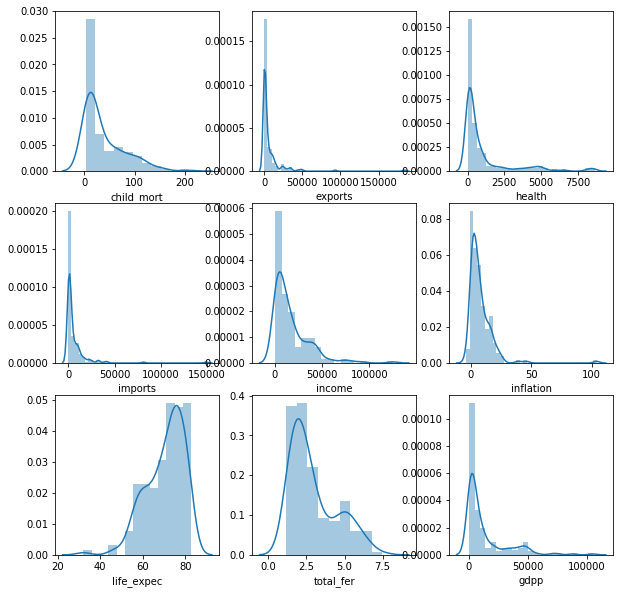

In [359]:
# check if available data is forming any such group, which can help define cluster - 
plt.figure(figsize = (10,10))
for i in enumerate(list_of_columns[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df_country[i[1]])

- In first observation, Seems like none of the numeric variables are helping for creating the profile for cluster.
- We will be using all the columns for clustering and only 3 columns namely GDPP, CHILD_MORT and INCOME for profiling.

3.2 - Univariate Analysis

In [360]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


3.2.1 - Categorical Variables

There is no such variable to define categories.

3.2.2 - Continous Variables

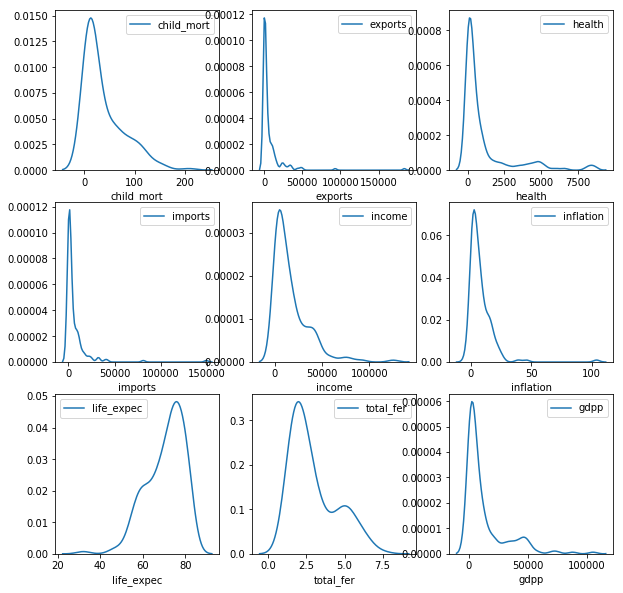

In [361]:
plt.figure(figsize = (10,10))

for i in enumerate(list_of_columns[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df_country[i[1]], hist = False,label=i[1])

 - 

3.3 - Bivariate Analysis

3.3.1 - Analysis for Bivariate - Continuous - Continuous

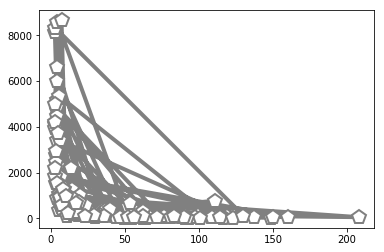

In [362]:
plt.plot(df_country.child_mort, df_country.health, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

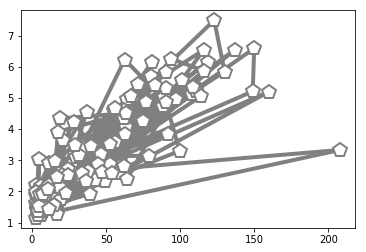

In [363]:
plt.plot(df_country.child_mort, df_country.total_fer, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

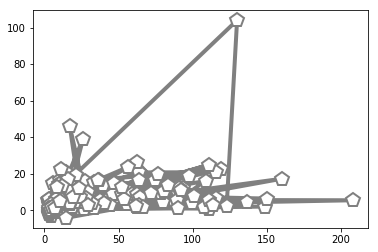

In [364]:
plt.plot(df_country.child_mort, df_country.inflation, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.show()

3.3.2 - Analysis for Bivariate - Categorical – Continuous

There is no such categorical variable.

3.3.3 - Analysis for Bivariate - Categorical -Categorical

There is no such categorical variable.

### 3: Outliers observations and treatment

3.1 - To plot the box plot for all the columns

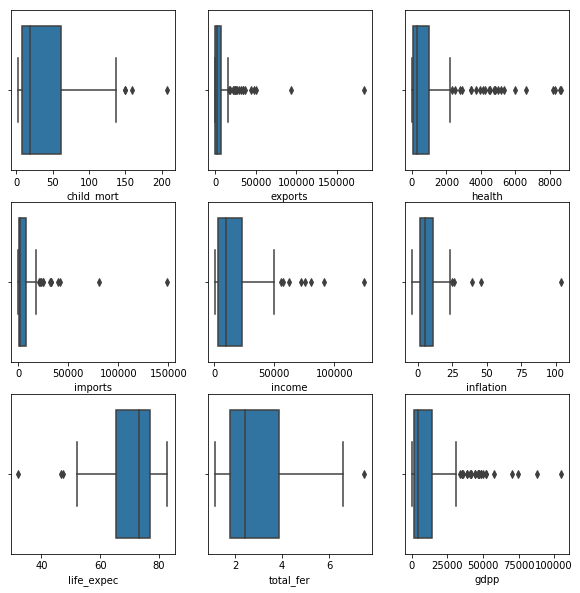

In [365]:
plt.figure(figsize = (10,10))
for i in enumerate(list_of_columns[1:]):
#     print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df_country)

- gppp, income and inflation columns are having high outliers.
- let's not remove outlier from inflation as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).
- Outliers in lower range represents those countries having low income, so we may loose those countries by dropping them
- child mortalily has higher range that means low income for the country.

3.2 - Capping the data to take care outliers

In [366]:
df_country_cap = df_country.copy()

In [367]:
# winsorizing outliers/capping outliers
def percentile_capping(df, cols,from_low_end,from_high_end):
    for col in cols:
        lower_bound = df[col].quantile(from_low_end)
        upper_bound = df[col].quantile(1-from_high_end)
        
        df[col] = np.where(df[col]>upper_bound,  upper_bound,
                           np.where(df[col]<lower_bound, lower_bound,df[col]))

In [368]:
percentile_capping(df_country_cap,df_country_cap.columns[1:],0.05,0.05)

In [369]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [370]:
df_country_cap.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,5784.478480,954.366191,5142.509689,15755.491018,7.016075,70.830060,2.922389,12003.719162
std,36.193830,8579.136537,1453.198372,6694.383178,14770.353771,6.271398,8.039216,1.438264,15154.443890
min,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


now check the outliers

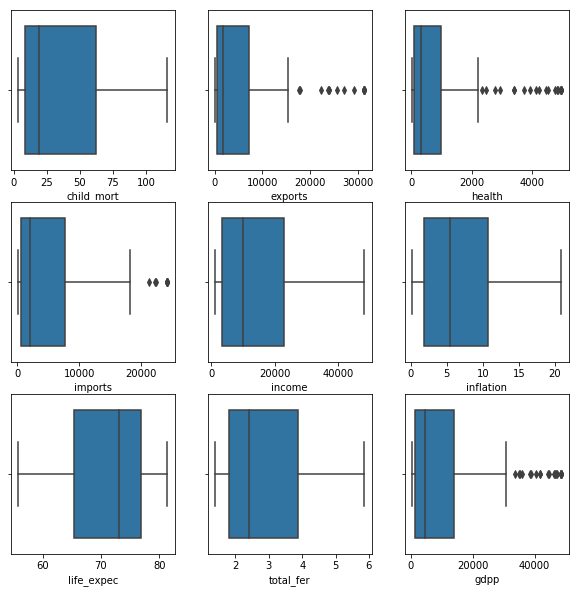

In [371]:
plt.figure(figsize = (10,10))
for i in enumerate(list_of_columns[1:]):
#     print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df_country_cap)

- Still gdpp and health columns looks skewed, we can increared the upper bound limit for there columns to take care of these columns. for now moving ahead with our analysis.

#### 4: Visualising the Data

<Figure size 576x576 with 0 Axes>

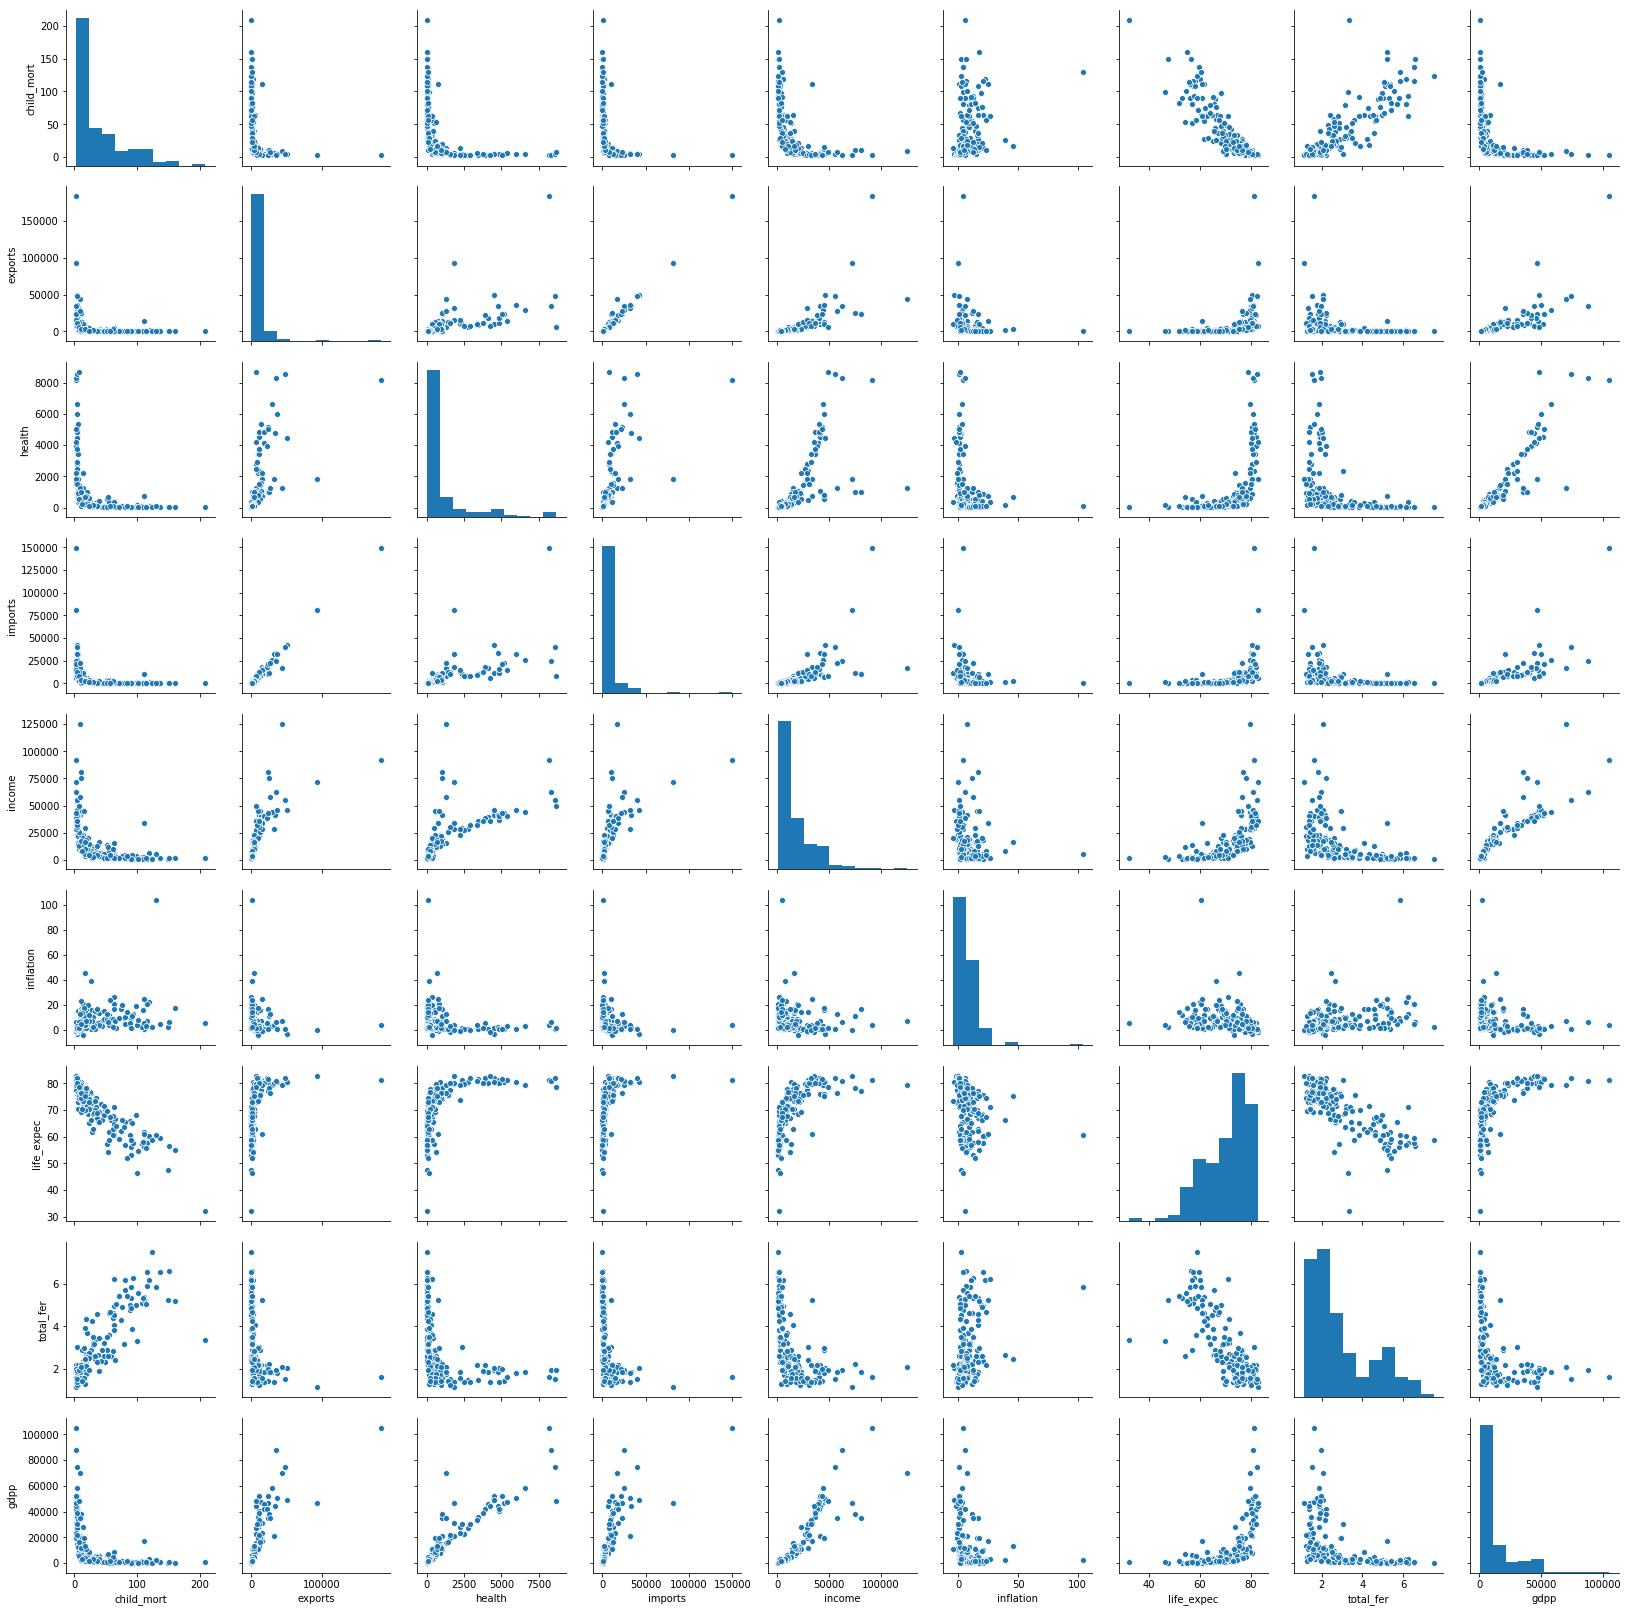

In [372]:
#pairplot of numerical variables
plt.figure(figsize = (8,8))
sns.pairplot(df_country)
plt.show()

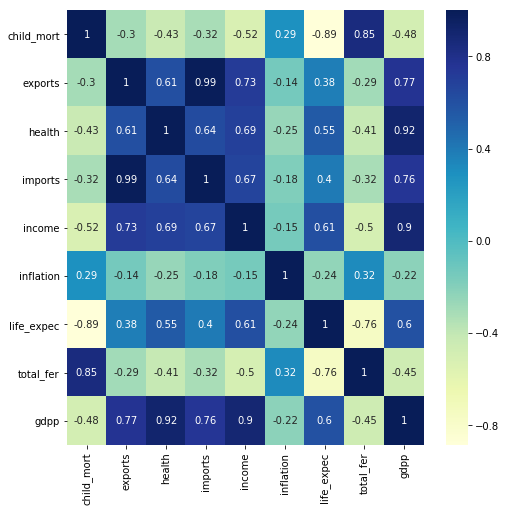

In [373]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(df_country.corr(),annot = True,cmap="YlGnBu")

High correlation :
- between total_fer and child_mort 
- between gdpp and income, and
- between imports and exports

#### 4: HOPKINS: Cluster Tendency before scaling (Hopkins Statistics)

In [374]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [375]:
hopkins(df_country[df_country_cap.columns[1:]])

0.9511513752482844

In [376]:
# df_country.columns[1:]

In [377]:
# df_country[df_country.columns[1:]]

#### 5: Scaling

In [378]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_country_scale = ss.fit_transform(df_country_cap[df_country_cap.columns[1:]])
df_country_scale

array([[ 1.47958789, -0.66803864, -0.62977844, ..., -1.82530988,
         2.02071786, -0.7578739 ],
       [-0.56002364, -0.54238923, -0.47380714, ...,  0.68245351,
        -0.88733091, -0.52377507],
       [-0.26350403, -0.47604845, -0.53034406, ...,  0.70740638,
        -0.02258739, -0.49928636],
       ...,
       [-0.37435248, -0.56600553, -0.59686482, ...,  0.2832076 ,
        -0.67811877, -0.70777132],
       [ 0.54014725, -0.63033074, -0.61187406, ..., -0.41547275,
         1.21873798, -0.70777132],
       [ 1.28283189, -0.61312123, -0.59935647, ..., -1.8777109 ,
         1.72782086, -0.69784347]])

In [379]:
df_country_scale = pd.DataFrame(df_country_scale,columns = df_country_cap.columns[1:])
# df_country_scale.columns = df_country.columns[1:]
df_country_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


#### 6: HOPKINS: Cluster Tendency after scaling

In [445]:
hopkins(df_country_scale)

0.8461208882098205

#### 7: Find the best value of K:

7.1 - silhouette_score

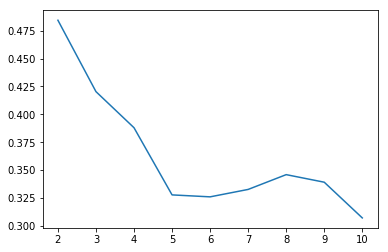

In [381]:
from sklearn.metrics import silhouette_score
# looks at the maximum value
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df_country_scale)
    ss.append([k, silhouette_score(df_country_scale, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

7.2 - elbow curve

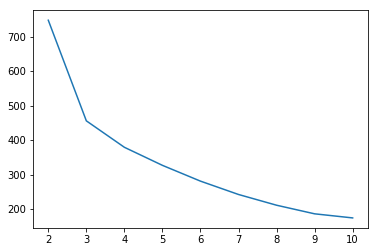

In [382]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df_country_scale)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

Final KMeans with K==3

### 8: K-Means Clustering

In [383]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df_country_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [384]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [385]:
df_country_kmeans = df_country.copy()

In [386]:
df_country_kmeans['cluster_id'] = kmean.labels_

In [390]:
df_country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [393]:
# Let's check how may data points we have in each cluster
df_country_kmeans.cluster_id.value_counts()

1    82
0    48
2    37
Name: cluster_id, dtype: int64

Plotting

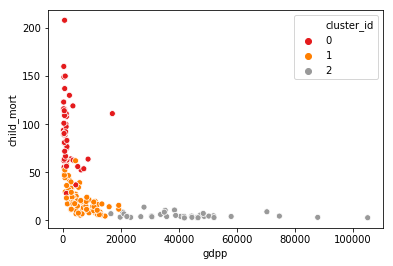

In [396]:
sns.scatterplot(x = 'gdpp',
                y ='child_mort', 
                hue = 'cluster_id',
                data =df_country_kmeans, palette = 'Set1')

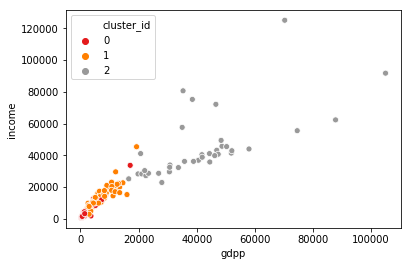

In [398]:
sns.scatterplot(x = 'gdpp',
                y ='income',
                hue = 'cluster_id',
                data =df_country_kmeans, 
                palette = 'Set1')

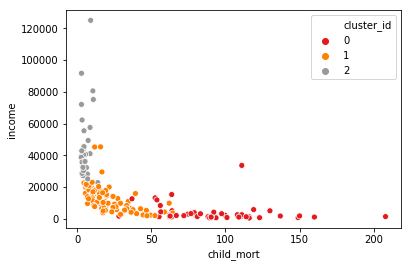

In [399]:
sns.scatterplot(x = 'child_mort', 
                y ='income', 
                hue = 'cluster_id',
                data =df_country_kmeans,
                palette = 'Set1')

Cluster Profiling
To make sense out of the cluster

Assignment

GDPP
Income
Child_Mort

In [401]:
df_country_kmeans[['gdpp', 'income', 'child_mort']].groupby(df_country_kmeans.cluster_id).mean()

,gdpp,income,child_mort
cluster_id,,,
0,1909.208333,3897.354167,91.610417
1,6287.463415,12304.756098,21.951220
2,42102.702703,45056.756757,5.237838


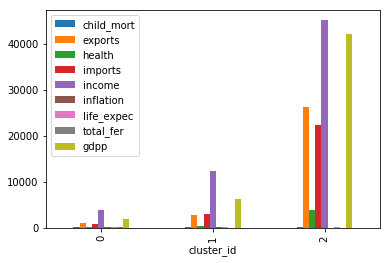

In [403]:
# Making sense out of the clsuters
df_country_kmeans.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

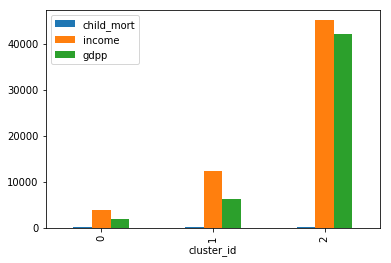

In [406]:
# GDP, INCOME AND CHID_MORT
df_country_kmeans.drop(['exports', 
               'health', 
               'imports',
               'inflation',
               'life_expec',
               'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

plt.show()

Clusters 0 and 1 having low income, low GDP and High Child Mortality compare to cluster 2.

Analysis of the clusters:

In [421]:
child_mort_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).child_mort.mean())
exports_mean= 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).exports.mean())
health_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).health.mean())
imports_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).imports.mean())
income_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).income.mean())
inflat_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(df_country_kmeans.groupby(["cluster_id"]).gdpp.mean())

In [425]:
df_cluster_analysis = pd.concat([pd.Series([0,1,2]),
                                 child_mort_mean,
                                 exports_mean,
                                 health_mean,
                                 imports_mean,
                                 income_mean,
                                 inflat_mean,
                                 life_expec_mean,
                                 total_fer_mean,
                                 gdpp_mean],
                                axis=1)

In [426]:
df_cluster_analysis.columns = ["cluster_id",
                               "child_mort_mean",
                               "exports_mean",
                               "health_mean",
                               "imports_mean",
                               "income_mean",
                               "inflation_mean",
                               "life_expec_mean",
                               "total_fer_mean",
                               "gdpp_mean"]
df_cluster_analysis

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,1,21.951220,2789.162177,393.062322,2900.485623,12304.756098,7.708037,72.937805,2.289390,6287.463415
2,2,5.237838,26171.270270,3749.510541,22235.610811,45056.756757,2.588432,79.956757,1.755676,42102.702703


In [432]:
a = df_cluster_analysis.columns
a

Index(['cluster_id', 'child_mort_mean', 'exports_mean', 'health_mean',
       'imports_mean', 'income_mean', 'inflation_mean', 'life_expec_mean',
       'total_fer_mean', 'gdpp_mean'],
      dtype='object')

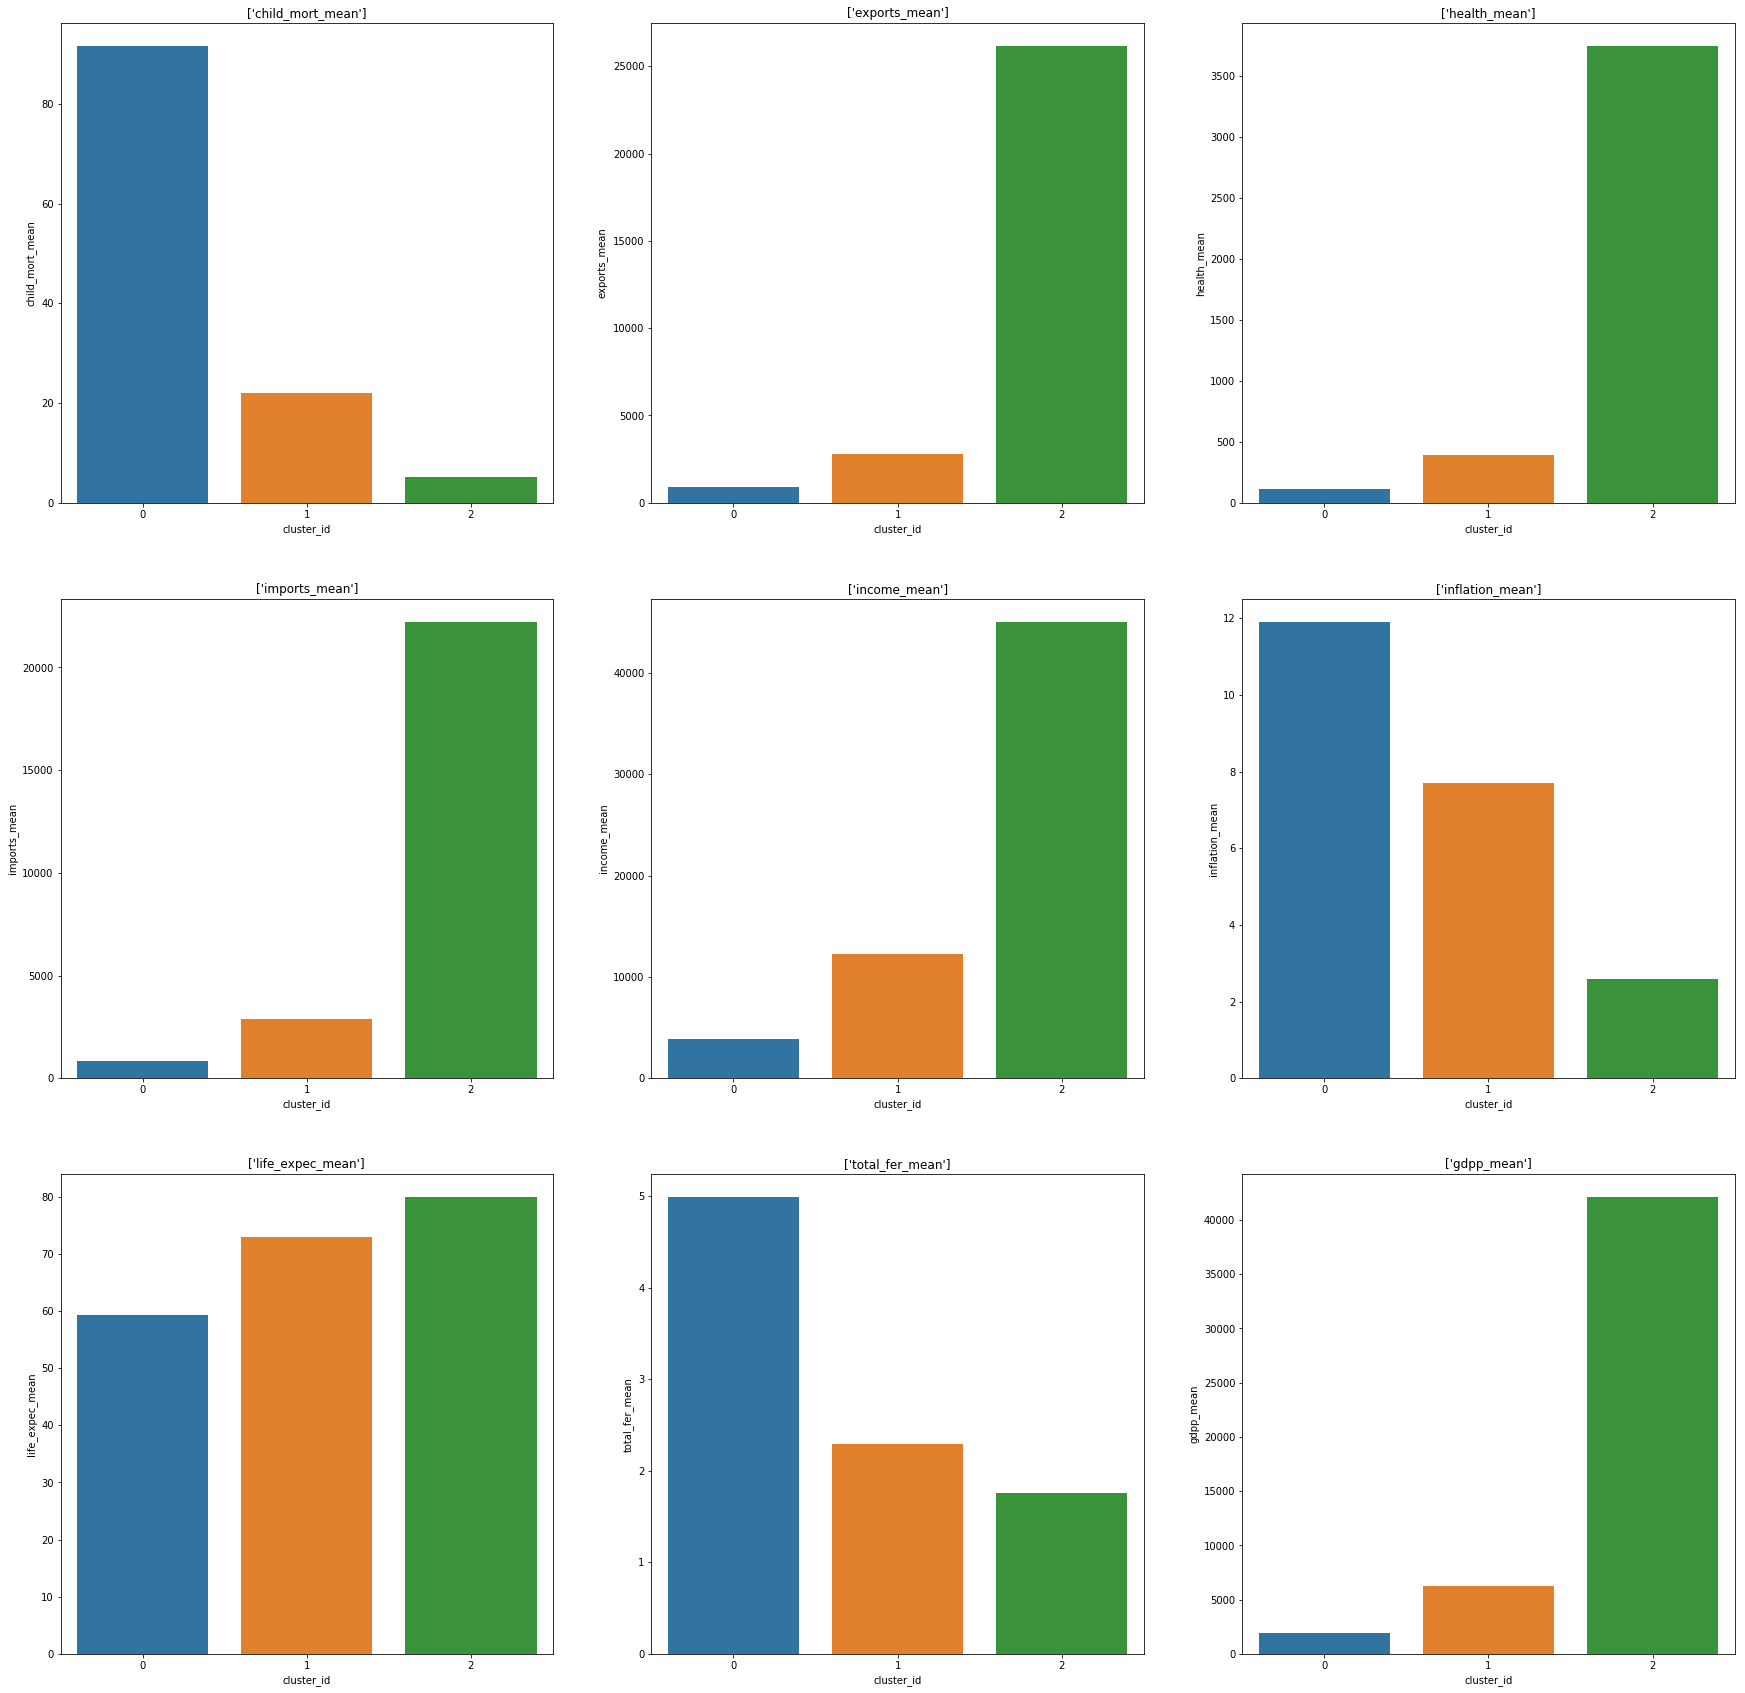

In [441]:
plt.figure(figsize = (30,30))
for i in enumerate(df_cluster_analysis.columns[1:]):
    plt.subplot(3,3,i[0]+1)
    plt.title([i[1]])
    sns.barplot(df_cluster_analysis.cluster_id, df_cluster_analysis[i[1]])
plt.show()

In [412]:
df_country_kmeans[df_country_kmeans['cluster_id'] == 0].sort_values(by = ['child_mort',
                                                   'income',
                                                   'gdpp'], 
                                             ascending = [False, True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


As per K- means clustering, and based on gdpp, child_mort and income cluster, following are the contries, which are direst need of aid:

1 - Haiti
2 - Sierra Leone
3 - Chad
4 - Central African Republic
5 - Mali
6 - Nigeria
7 - Niger
8 - AngolaCongo, Dem. Rep.
9 - Congo, Dem. Rep.
10 - Burkina Faso

#### 9: Hierarchical Clustering:

In [446]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [447]:
df_country_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [448]:
df_country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


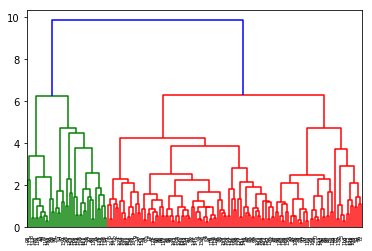

In [449]:
#single linkage
mergings = linkage(df_country_scale,
                   method = 'complete',
                   metric = 'euclidean')

dendrogram(mergings)
plt.show()

In [450]:
# clusters
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [452]:
cluster_id = cut_tree(mergings,n_clusters=3).reshape(-1, )
cluster_id

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [454]:
df_country_kmeans_2 = df_country_kmeans.copy()

In [456]:
df_country_kmeans_2['cluster_id'] = cluster_id
df_country_kmeans_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [458]:
df_country_kmeans_2[df_country_kmeans_2['cluster_id'] == 0].sort_values(by = ['child_mort',
                                                            'income',
                                                            'gdpp'], 
                                                      ascending = [False, True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


Also as per Hierarchical clustering , and based on gdpp, child_mort and income cluster, following are the contries, which are direst need of aid:=

1 - Haiti
2 - Sierra Leone
3 - Chad
4 - Central African Republic
5 - Mali
6 - Nigeria
7 - Niger
8 - AngolaCongo, Dem. Rep.
9 - Congo, Dem. Rep.
10 - Burkina Faso